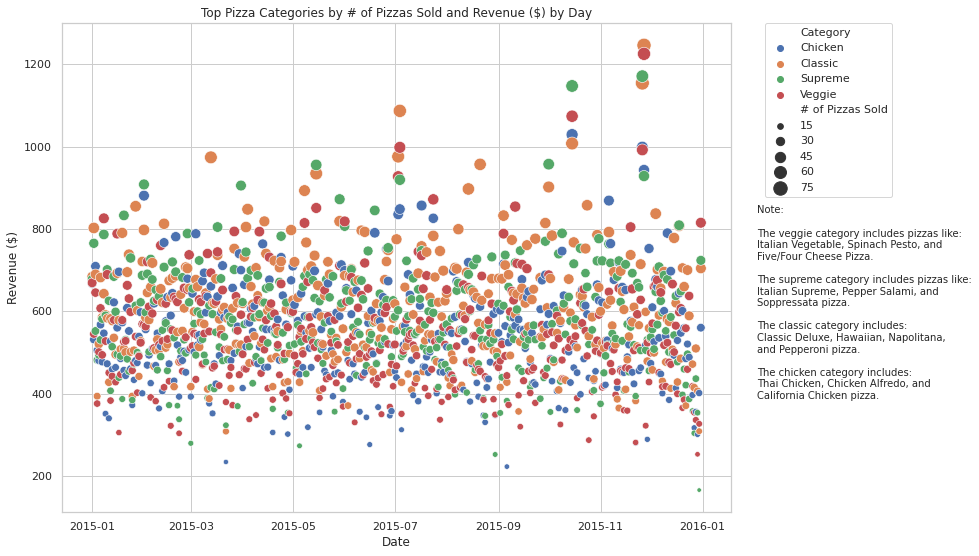

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Resultsd.csv')

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['revenue'] = df['price']

df.set_index('datetime', inplace=True)

daily_data = df.groupby([pd.Grouper(freq='D'), 'category']).agg({'order_details_id': 'count', 'revenue': 'sum'}).reset_index()

daily_data.columns = ['day', 'category', 'count', 'revenue']

top_categories = daily_data.groupby('category')['count'].sum().nlargest(10).index

daily_data = daily_data[daily_data['category'].isin(top_categories)]

sns.set(rc={'figure.figsize': (12, 9)})
sns.set_style("whitegrid")

scatter = sns.scatterplot(x='day', y='revenue', hue='category', size='count', sizes=(20, 200), data=daily_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


handles, labels = scatter.get_legend_handles_labels()
labels = ['# of Pizzas Sold' if label == 'count' else label.capitalize() for label in labels]
scatter.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Top Pizza Categories by # of Pizzas Sold and Revenue ($) by Day')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')


note = "Note:\n\nThe veggie category includes pizzas like:\nItalian Vegetable, Spinach Pesto, and\nFive/Four Cheese Pizza.\n\nThe supreme category includes pizzas like:\nItalian Supreme, Pepper Salami, and\nSoppressata pizza.\n\nThe classic category includes:\nClassic Deluxe, Hawaiian, Napolitana,\nand Pepperoni pizza.\n\nThe chicken category includes:\nThai Chicken, Chicken Alfredo, and\nCalifornia Chicken pizza."
plt.figtext(.93, 0.3, note, fontsize=10, transform=plt.gcf().transFigure)

plt.savefig('CHART11.png', dpi=300, bbox_inches='tight')
